[[0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

<ipython-input-528-f6da22979bb3>:89: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(epsx, epsy, im3>0)


<Figure size 432x288 with 0 Axes>

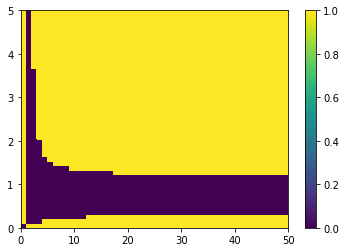

<Figure size 432x288 with 0 Axes>

In [528]:
import numpy as np
from scipy.integrate import odeint
import scipy
a=0.2
#K=3
def rossler_coupled(X,Y,DX,DY,Ax, eps_x, Ay, eps_y):
    xdot=-Y+DY[0]+eps_x*(Ax*DX).sum(1)
    ydot=X+a*(Y+DY[0])+eps_y*(Ay*DY).sum(1)
    W=np.concatenate([xdot,ydot]).reshape([2,-1])
    return W

def rossler_intrinsic(S,t):
    X,Y,Z=S[0], S[1], S[2]
    xdot=-Y-Z
    ydot=X+a*Y
    zdot=b+Z*(X-c)
    return np.array([xdot,ydot,zdot])
    

#G=np.array([[0,1,0],[1,0,0],[0,0,0]])
#H=np.array([[0,0,0],[0,0,1],[0,1,0]])

#K=3
K=20
H=(np.random.randn(K//2,K//2)<0.3)*(1.0-np.eye(K//2))
H2=(np.random.randn(K//2,K//2)<0.3)*(1.0-np.eye(K//2))
H=((np.triu(H)+np.triu(H).T)>0)*1
H2=((np.triu(H2)+np.triu(H2).T)>0)*1
H=scipy.linalg.block_diag(H,H2)
print(H)
G=np.zeros(G.shape)
for i in range(K//2):
    if np.random.rand()<0.6:
        G[i,i+K//2]=1
        G[i+K//2,i]=1
        if np.random.rand()<0.4:
            G[i+K//2,i+1]=1
print(G)
Kx=int(2*(K-1))
Ky=int(2*(K-1))

def matrix(e_x, e_y, Ax, Ay):
    global K
    Ddot=np.zeros([2,K,K,2,K,K])
    for i in range(K):
        for j in range(K):
            if i==j:
                continue
            Ddot[0,i,j,1,i,j]=-1
            Ddot[1,i,j,0,i,j]=1
            Ddot[1,i,j,1,i,j]=a
            for k in range(K):
                if k!=i:
                    Ddot[0,i,j,0,i,k]-=e_x*Ax[i,k]
                    Ddot[1,i,j,1,i,k]-=e_y*Ay[i,k]
                if k!=j:
                    Ddot[0,i,j,0,j,k]+=e_x*Ax[j,k]
                    Ddot[1,i,j,1,j,k]+=e_y*Ay[j,k]

                    
    return np.array(Ddot[:,:,:,:]).reshape([K*K*2,K*K*2])
    
    
def stability(eps_x,eps_y):
    B=matrix(eps_x,eps_y,G,H)
  #  print(B)
    E=np.linalg.eig(B)[0]
    R=np.real(E)
    R=R[np.abs(R-0.1)>1e-10]
    R=R[np.abs(R)>1e-10]
  #  print(R)
  #  print(R_)
    return R.max() if len(R)>0 else 0

N=50
eps=np.linspace(0,50,N)
eps2=np.linspace(0,5,N)
epsx=np.zeros([N,N])
epsy=np.zeros([N,N])
im3=np.zeros([N,N])
for i in range(N):
  for j in range(N):
    im3[i,j]=stability(eps[i],eps2[j])
    epsx[i,j]=eps[i]
    epsy[i,j]=eps2[j]
  if i%10==0:
      print(i)

plt.pcolor(epsx, epsy, im3>0)
plt.colorbar()
plt.figure()






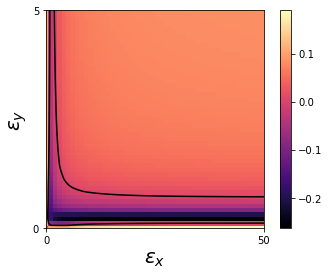

In [188]:
np.savetxt('G.txt',G)
np.savetxt('H.txt',G)
from matplotlib import pyplot as plt
import networkx as nx
plt.imshow(im3.reshape([N,N]).T[:,:],cmap='magma', interpolation='none')
plt.colorbar()
plt.contour(epsx.reshape([N,N])*N/50,epsy.reshape([N,N])*N/5,im3.reshape([N,N]),levels=[0],colors=['k'], linestyles=['-'], linewidths=[1.5])
plt.xlim([0,N-1])
plt.ylim([0,N-1])
plt.xticks([0,N-1],['0','50'])
plt.yticks([0,N-1],['0','5'])
plt.xlabel('$\epsilon_x$',fontsize=20)
plt.ylabel('$\epsilon_y$',fontsize=20)
plt.savefig('eigen_complex.png',dpi=600)


In [6]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
b=0.2
c=5.7
#im1=np.copy(im3)
#np.savetxt('im1_3.txt',im3)
im2=np.zeros([50,50])
Ax=G-np.diag(G.sum(1))
Ay=H-np.diag(H.sum(1))
def rossler3_coupled(S, eps_x, eps_y):
    X,Y,Z=S.reshape([-1,3]).T
    xdot=-Y -Z +eps_x*(Ax @ X)
    ydot=X+a*Y + eps_y * (Ay @ Y)
    zdot=b+Z*(X-c)
    W=np.concatenate([xdot,ydot,zdot]).reshape([3,-1]).T.flatten()
    return W

intrin=np.random.randn(3)
intrin=odeint(rossler_intrinsic,intrin,[0,1000])[-1]
print(intrin)
for i in range(50):
    for j in range(50):
        f=lambda x,t: rossler3_coupled(x, 50*i/50.0,5*j/50.0)
        Sf=odeint(f,(intrin.reshape([-1,3])*np.ones([K,3])+np.random.rand(K,3)*0.01).flatten(),np.linspace(0,500,1000))[-200:]
        SE=np.linalg.norm(Sf[:,3:].reshape([-1,K-1,3])-Sf[:,0:3].reshape([-1,1,3]),axis=2).max()
        im2[i,j]=SE
        print(im2[i,j],end=" ")
    print(i)

NameError: name 'rossler_intrinsic' is not defined

<ipython-input-694-a2a61fa7a48d>:8: RuntimeWarning: invalid value encountered in sqrt
  my_cmap[:,0:3] =np.minimum((my_cmap[:,:3]*np.array([0.999,0.888,1.0]).reshape([1,-1])-0.01)**(1/2),1.0)
<ipython-input-694-a2a61fa7a48d>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(map(str, list(range(51)))),fontsize=18)
<ipython-input-694-a2a61fa7a48d>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(map(str, list(range(6)))),fontsize=18)


[]
[-12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.]
[-12.  -4.   4.]


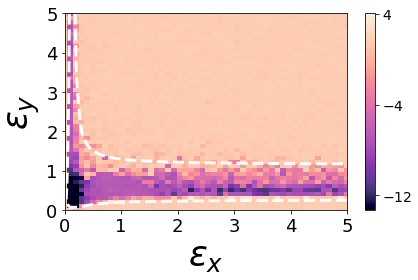

In [694]:
np.savetxt('im2_3.txt',im2)
from matplotlib import pyplot as plt
from matplotlib import colors
import networkx as nx
from numpy import ma
N=50
my_cmap = plt.cm.magma(np.arange(plt.cm.magma.N))
my_cmap[:,0:3] =np.minimum((my_cmap[:,:3]*np.array([0.999,0.888,1.0]).reshape([1,-1])-0.01)**(1/2),1.0)
my_cmap = colors.ListedColormap(my_cmap)
e_x,e_y=np.meshgrid(np.linspace(0,50,50),np.linspace(0,5,50))
plt.pcolor(e_x,e_y,ma.log10(1e-100+im2.T.reshape([N,N])[:,:]).filled(-100),cmap=my_cmap,shading='nearest')
print(np.argwhere(im2<=0))
#plt.colorbar()
#plt.contour(e_x,e_y,im2.T.reshape([N,N]),levels=[0.001],colors=['k'], linestyles=['-'], linewidths=[1.5])
Cb=plt.colorbar()
labels=Cb.get_ticks()
print(labels)
Cb.set_ticks(list(labels[::4]))
labels=Cb.get_ticks()
print(labels)

Cb.set_ticklabels((('$%i$ '*len(labels))%tuple(labels)).split())
Cb.ax.tick_params(labelsize=14)
ax=plt.gca()
x=np.linspace(0,50,50)
y=np.linspace(0,5,50)
x,y=np.meshgrid(x,y)
plt.contour(x.reshape([50,50]),y.reshape([50,50]),im3.T.reshape([50,50]),levels=[0],colors=['w'], linestyles=['--'], linewidths=[3])
xl=[0,50]
yl=[0,5]
ax.set_xlim(xl)
ax.set_ylim(yl)
ax.set_xlabel('$\epsilon_x$',fontsize=35)
ax.set_ylabel('$\epsilon_y$',fontsize=35)
ax.set_xticklabels(list(map(str, list(range(51)))),fontsize=18)
ax.set_yticklabels(list(map(str, list(range(6)))),fontsize=18)
plt.tight_layout()
plt.savefig('SE_complex.png',dpi=600)

<ipython-input-465-eb2401341c88>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(e_x,e_y,im3.T.reshape([N,N])[:,:],cmap='magma')


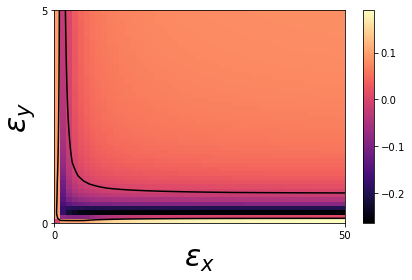

In [465]:
np.savetxt('im3_2.txt',im3)
from matplotlib import pyplot as plt
import networkx as nx
N=50
e_x,e_y=np.meshgrid(np.linspace(0,50,50),np.linspace(0,5,50))
plt.pcolor(e_x,e_y,im3.T.reshape([N,N])[:,:],cmap='magma')
plt.colorbar()
plt.contour(e_x,e_y,im3.T.reshape([N,N]),levels=[0.001],colors=['k'], linestyles=['-'], linewidths=[1.5])
plt.xlim([0,50])
plt.ylim([0,5])
plt.xticks([0,50],['0','50'])
plt.yticks([0,5],['0','5'])
plt.xlabel('$\epsilon_x$',fontsize=20)
plt.ylabel('$\epsilon_y$',fontsize=20)
plt.savefig('eig_complex.eps')